In [50]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns


import sklearn 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [9]:
def My_LinReg(X_train,X_test,y_train,y_test):
    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    y_pred = linreg.predict(X_test)
    linreg_score = np.sqrt(mean_squared_error(y_test,y_pred))

    print(f'Unconstrained Linear Regression RMSE: {linreg_score}');
    plt.scatter(y_pred,y_test)
    plt.plot([0,y_pred.max()],[0,y_pred.max()],color='red');
    plt.title(r2_score(y_test,y_pred))
    return linreg

In [51]:
def my_SGD(X_train,X_test,y_train,y_test):
    sgdreg = SGDRegressor(penalty= 'elasticnet',l1_ratio = .5,random_state= 42)
    sgdreg.fit(X_train,y_train)
    y_pred = sgdreg.predict(X_test)
    sgdreg_score = np.sqrt(mean_squared_error(y_test,y_pred))

    print(f'SGD Regression RMSE: {sgdreg_score}');
    plt.scatter(y_pred,y_test)
    plt.plot([0,y_pred.max()],[0,y_pred.max()],color='red');
    plt.title(r2_score(y_test,y_pred))

In [10]:
def my_Forest(X_train,X_test,y_train,y_test):
    forest_reg = RandomForestRegressor()
    forest_reg.fit(X_train,y_train)
    y_pred = forest_reg.predict(X_test)

    forest_reg_score = np.sqrt(mean_squared_error(y_test,y_pred))
    print(f'SGD Regression RMSE: {forest_reg_score}');

    plt.scatter(y_pred,y_test)
    plt.plot([0,y_pred.max()],[0,y_pred.max()],color='red')
    plt.title(r2_score(y_test,y_pred))


In [59]:
def my_mini_batch(model,X_train,X_val,y_train,y_val,batch_size,iters):
    batch_indx = random.sample(range(len(X_train)),int(len(X_train)*batch_size / 100))
    pred_loss,val_loss = [],[]
    
    for i in range(iters):
        subX = X_train.iloc[batch_indx]
        subY = y_train.iloc[batch_indx]

        model.partial_fit(subX,subY)

            
        y_pred_train = model.predict(subX)
        pred_loss.append(np.sqrt(mean_squared_error(subY,y_pred_train)))
        
        y_pred_val = model.predict(X_val)
        val_loss.append(np.sqrt(mean_squared_error(y_val,y_pred_val)))
        
        if i % 100 == 0:
            print(f'Validation loss: {val_loss[i]}')
    
    plt.plot(range(iters),pred_loss,color ='red',label='Training Loss')
    plt.plot(range(iters),val_loss,color = 'blue',label = 'Validation Loss')
    plt.legend()
    return model

In [31]:
housing = pd.read_csv('C:/Users/Gerardo/Documents/Projects/PythonProjects/data_folder/housing/housing.csv')
print(housing.shape)
housing.sample(10)

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15692,-122.44,37.79,52.0,2045.0,353.0,722.0,327.0,8.0755,500001.0,NEAR BAY
13846,-117.35,34.50,10.0,2163.0,392.0,1174.0,362.0,3.3750,98000.0,INLAND
10218,-117.88,33.89,18.0,1616.0,532.0,866.0,496.0,3.6435,119100.0,<1H OCEAN
18698,-122.38,40.58,36.0,1808.0,384.0,807.0,383.0,1.8375,74800.0,INLAND
11239,-117.96,33.82,19.0,1199.0,251.0,730.0,276.0,3.6422,209400.0,<1H OCEAN
16962,-122.31,37.54,45.0,1222.0,220.0,492.0,205.0,5.5390,396900.0,NEAR OCEAN
6376,-118.03,34.15,43.0,1694.0,283.0,674.0,267.0,4.1797,486800.0,INLAND
14766,-117.10,32.58,33.0,393.0,76.0,330.0,80.0,4.1029,122700.0,NEAR OCEAN
19764,-122.14,40.07,31.0,2053.0,465.0,1193.0,447.0,1.4923,44400.0,INLAND
13104,-121.32,38.41,17.0,4401.0,655.0,1970.0,639.0,5.8239,247500.0,INLAND


# Address NaNs

In [32]:
housing.dropna(inplace=True)
print(housing.shape)

(20433, 10)


# One Hot Encode

In [25]:
x_onehot = {}
my_onehot = OneHotEncoder()
tmp_out  = my_onehot.fit_transform(housing['ocean_proximity'].values.reshape(-1,1)).toarray()

for i in range(tmp_out.shape[1]):
    x_onehot['ocean_proximity_' + str(i)] = tmp_out[:,i]

# Scale Data

In [40]:
num_cols = ['longitude','latitude',
            'housing_median_age','total_rooms',
            'total_bedrooms','population',
            'households','median_income']

x_scaled = {}
my_scaler = StandardScaler()
tmp_out = my_scaler.fit_transform(housing[num_cols])

for i,c in enumerate(num_cols):
    x_scaled[c] = tmp_out[:,i]

In [46]:
x_scaled.update(x_onehot) #merge dictionaries
X = pd.DataFrame(x_scaled,columns = x_scaled.keys())
y  = housing['median_house_value']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=.5)

Unconstrained Linear Regression RMSE: 70527.67675076371


LinearRegression()

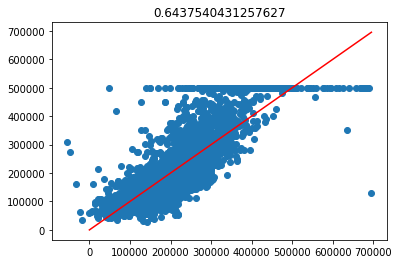

In [49]:
My_LinReg(X_train,X_test,y_train,y_test)

SGD Regression RMSE: 70618.95392209227


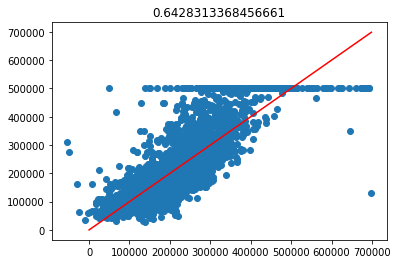

In [52]:
my_SGD(X_train,X_test,y_train,y_test)

Validation loss: 73580.4187726461
Validation loss: 68622.56332812757
Validation loss: 68637.86897380144
Validation loss: 68642.0555951914
Validation loss: 68641.59907507806
Validation loss: 68639.56300710332
Validation loss: 68637.11580393725
Validation loss: 68634.689481421
Validation loss: 68632.43078943132
Validation loss: 68630.37562312376
SGD Regression RMSE: 70777.81308817002


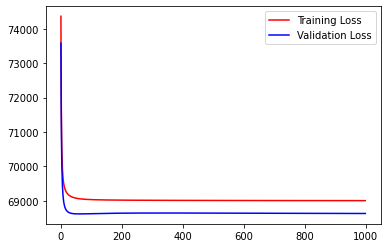

In [62]:
newsgd = SGDRegressor(penalty= 'elasticnet',l1_ratio = .1,random_state= 42)
newsgd = my_mini_batch(newsgd,X_train,X_val,y_train,y_val,10,1000)

y_pred = newsgd.predict(X_test)
newsgd_score = np.sqrt(mean_squared_error(y_test,y_pred))

print(f'SGD Regression RMSE: {newsgd_score}')

SGD Regression RMSE: 50201.01853645603


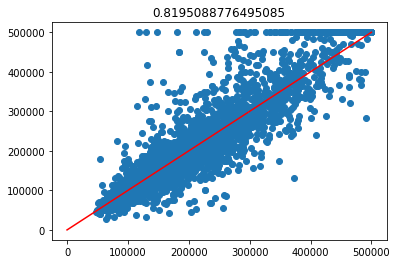

In [63]:
my_Forest(X_train,X_test,y_train,y_test)